In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline  


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.integrate import quad
from sklearn.gaussian_process.kernels import RBF

from mc import *

 ## 1-D Examples

In [3]:
def f1(x):
    if x>=0 and x<=1:
        return np.exp(x)*np.sin(np.pi*x) -x**3 
    return 0
f1=np.vectorize(f1)

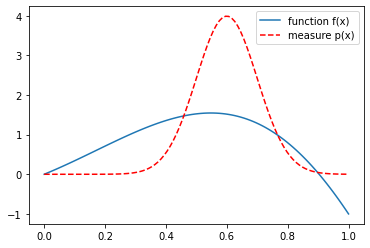

In [6]:
b=np.array([0.6])
B=np.array([[.01]])
p=multivariate_normal(mean=b,cov=B)
ax=np.linspace(0,1,100)
plt.plot(ax,f1(ax), label="function f(x)")
plt.plot(ax,p.pdf(ax),"--", color="r",label="measure p(x)")
plt.legend()
plt.savefig("./f.png")
plt.show()

In [9]:
X=p.rvs(100).reshape(-1,1)

In [10]:
alpha=quad(lambda x: abs(f1(x))*p.pdf(x) ,0,1)[0]     # the integrand of |f1(x)|p(x)
I= quad(lambda x: f1(x)*p.pdf(x) ,0,1)[0]
print("SMC estiamte, variance: ", smc(f1,X))
print("OIS estiamte, variance: ",ois(f1,X,p.pdf,alpha))
print("True integral value:",I)

SMC estiamte, variance:  (1.422107868900896, 0.02461823787041261)
OIS estiamte, variance:  (1.4066505293237213, 3.516293134222976)
True integral value: 1.4060679411423356


In [13]:
y=f1(X)       #functions values on X

In [14]:
e,v=Bmc(Gaussian_kernel,noise_level=0.001).fit(X,y,p).integrate()
print( "bmc extimate: ",e[0], "variance: ", v)

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


bmc extimate:  18925120.87677796 variance:  -0.015666848544196123


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [22]:
# bmc estimate with the function
e,v=bmc(X=X,y=y,p=p)
print( "bmc extimate : ",e[0], "variance: ", v)

bmc extimate :  0.9402191782412987 variance:  -0.46668843792175513
